In [78]:
%run ./Preprocessing.ipynb

Preprocessed : xtrain, xtest, ytrain, ytest
(74736, 13) (18684, 13) (74736,) (18684,)


In [79]:
%run ./LogisticRegression.ipynb
%run ./xgboost.ipynb
%run ./lgbm.ipynb

Preprocessed : xtrain, xtest, ytrain, ytest
(74736, 13) (18684, 13) (74736,) (18684,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-----------model_lr, pred_lr, probs_lr loaded-----------
------------Training Xgboost------------
Preprocessed : xtrain, xtest, ytrain, ytest
(74736, 13) (18684, 13) (74736,) (18684,)
[11:07:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------model_xgb, pred_xgb, probs_xgb loaded-----------
------------Training LgbmBoost------------
Preprocessed : xtrain, xtest, ytrain, ytest
(74736, 13) (18684, 13) (74736,) (18684,)
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	cv_agg's auc: 0.853566 + 0.00436133
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	cv_agg's auc: 0.

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve , classification_report , f1_score
import matplotlib.pyplot as plt

auc_xgb = roc_auc_score(ytest, probs_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(ytest, probs_xgb)

auc_lgbm = roc_auc_score(ytest, probs_lgbm)
fpr_lgbm, tpr_lgbm, thresholds_dt = roc_curve(ytest, probs_lgbm)

auc_lr = roc_auc_score(ytest, probs_lr)
fpr_lr, tpr_lr, thresholds_dt = roc_curve(ytest, probs_lr)

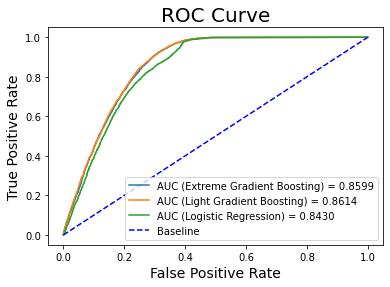

In [81]:
#plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (Extreme Gradient Boosting) = {auc_xgb:.4f}')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC (Light Gradient Boosting) = {auc_lgbm:.4f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.4f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

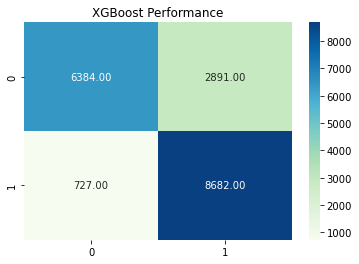

---------TRAIN SET XGB--------------
              precision    recall  f1-score   support

           0       0.69      0.91      0.78     28313
           1       0.93      0.75      0.83     46423

    accuracy                           0.81     74736
   macro avg       0.81      0.83      0.81     74736
weighted avg       0.84      0.81      0.81     74736

---------TEST SET XGB--------------
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      7111
           1       0.92      0.75      0.83     11573

    accuracy                           0.81     18684
   macro avg       0.81      0.82      0.80     18684
weighted avg       0.83      0.81      0.81     18684

F1 score  :  0.8063583815028902


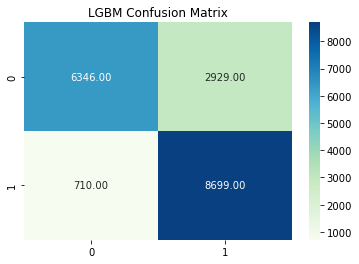

---------TRAIN SET LGBM--------------
              precision    recall  f1-score   support

           0       0.68      0.91      0.78     28061
           1       0.93      0.74      0.83     46675

    accuracy                           0.81     74736
   macro avg       0.81      0.83      0.80     74736
weighted avg       0.84      0.81      0.81     74736

---------TEST SET LGBM --------------
              precision    recall  f1-score   support

           0       0.68      0.90      0.78      7056
           1       0.92      0.75      0.83     11628

    accuracy                           0.81     18684
   macro avg       0.80      0.82      0.80     18684
weighted avg       0.83      0.81      0.81     18684

F1 score  :  0.8052344251766217


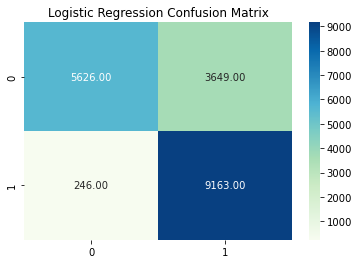

---------TEST SET LR --------------
              precision    recall  f1-score   support

           0       0.68      0.91      0.78     28138
           1       0.93      0.74      0.83     46598

    accuracy                           0.80     74736
   macro avg       0.80      0.82      0.80     74736
weighted avg       0.84      0.80      0.81     74736

---------TEST SET LR --------------
              precision    recall  f1-score   support

           0       0.61      0.96      0.74      5872
           1       0.97      0.72      0.82     12812

    accuracy                           0.79     18684
   macro avg       0.79      0.84      0.78     18684
weighted avg       0.86      0.79      0.80     18684

F1 score  :  0.7915328623421108


In [82]:
import seaborn as sns 

plt.title('XGBoost Performance')
cm=confusion_matrix(ytest,pred_xgb)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt = '.2f')
plt.show()

print('---------TRAIN SET XGB--------------')
print(classification_report(pred_xgb_train,ytrain))
print('---------TEST SET XGB--------------')
print(classification_report(pred_xgb,ytest))
print('F1 score  : ' ,  f1_score(ytest, pred_xgb, average='micro'))

plt.title('LGBM Confusion Matrix')
cm=confusion_matrix(ytest,pred_lgbm)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt = '.2f')
plt.show()
print('---------TRAIN SET LGBM--------------')
print(classification_report(pred_lgbm_train,ytrain))
print('---------TEST SET LGBM --------------')
print(classification_report(pred_lgbm,ytest))
print('F1 score  : ' ,  f1_score(ytest, pred_lgbm, average='micro'))

plt.title('Logistic Regression Confusion Matrix')
cm=confusion_matrix(ytest,pred_lr)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt = '.2f')
plt.show()
print('---------TEST SET LR --------------')
print(classification_report(pred_lr_train,ytrain))
print('---------TEST SET LR --------------')
print(classification_report(pred_lr,ytest))
print('F1 score  : ' ,  f1_score(ytest, pred_lr, average='micro'))

[[ 1.          0.          1.         ...  0.36886321  0.03856731
  -0.59762733]
 [ 1.          0.          1.         ... -1.38406201  0.03856731
  -0.59762733]
 [ 0.          1.          0.         ...  0.90547297  0.03856731
  -0.59762733]
 ...
 [ 1.          0.          1.         ... -1.38406201  0.03856731
  -0.59762733]
 [ 0.          1.          1.         ...  0.36886321  0.03856731
  -0.59762733]
 [ 1.          0.          1.         ... -1.38406201  0.03856731
  -0.59762733]]


Text(0.5, 0, 'Importance')

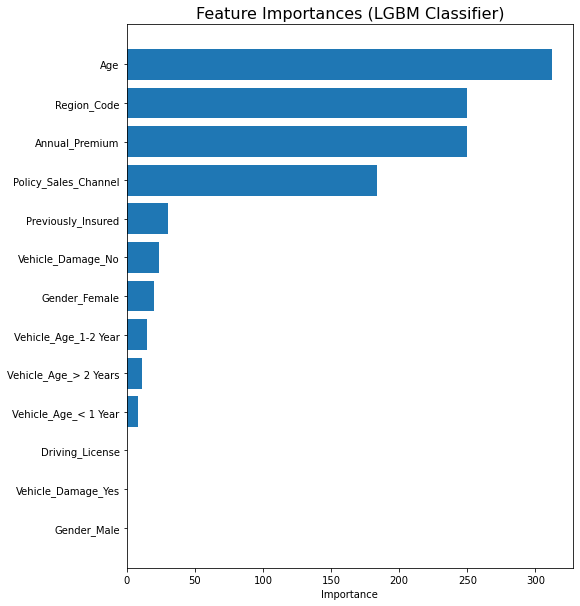

In [83]:
features = features_df.columns

print(xtest)
importances = model_lgbm.feature_importances_
index = np.argsort(importances)

plt.figure(figsize=(8,10))
plt.title('Feature Importances (LGBM Classifier)', fontsize = 16)
plt.barh(range(len(index)), importances[index],  align='center')
plt.yticks(range(len(index)), features[index])
plt.xlabel('Importance')